<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2024-12-21 15:05:44
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 42
-------------------
Initial Investment:  1.01 C
CY Investment:  1.14 C
Reserve:  2.50 K
Current:  1.17 C
-------------------
Today PnL: -2.22 L (-1.86%)
Current PnL: -7.90 L (-6.92%)
CY Booked + Current PnL: 2.37 L (2.08%)
-------------------
Total profit:  6.36 L
Total loss:  -14.27 L
-------------------
Total Booked + Current PnL: 15.48 L (15.32%)
Total Booked PnL: 23.38 L (23.14%)
Curr Year Booked PnL: 10.27 L (8.8%)
Prev Year Booked PnL: 13.11 L (12.98%)
Est FTT:  1.94 C
Est FTT PnL: 77.65 L (66.5%)
-------------------
Est LTT:  2.46 C
Est LTT PnL: 1.29 C (110.45%)
Deployed:  1.01 C
Current:  1.17 C
CAGR/XIRR %: 12.83%
Row successfully appended and saved to data/myPortfolioDB.csv.


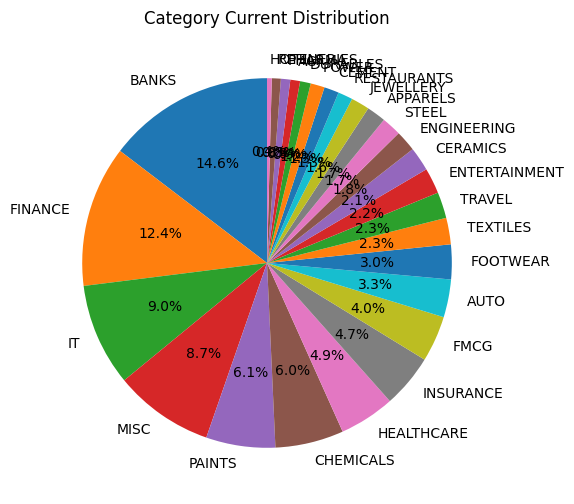

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
53,PAGEIND,38829.08,48856.35,52350.84,7.75,88.51,195425.0,40109.0,13973.0,-0.64,25.82,7.15,34.82,17.0,2.87,1.67,49.39,X40,ATH,APPARELS
46,LALPATHLAB,2519.90,2946.25,3689.00,-14.64,22.99,106065.0,15349.0,26739.0,-2.52,16.92,25.21,46.39,20.0,0.57,0.91,47.37,X40N,NTT,HEALTHCARE
59,RELIANCE,1322.24,1205.30,1595.48,-9.16,33.33,91603.0,-8887.0,29652.0,-2.04,-8.84,32.37,20.66,95.0,-0.30,0.78,0.00,X40,ATH,REFINERIES
77,TCS,4164.02,4170.30,4998.00,2.68,64.37,162642.0,245.0,32284.0,-2.38,0.15,19.85,20.03,22.0,0.01,1.39,15.37,X40,BTT,IT
54,PIDILITIND,2482.94,2976.80,3576.00,-12.48,51.72,172654.0,28643.0,34755.0,-0.41,19.89,20.13,44.02,14.0,0.82,1.48,19.18,X40,BTT,CHEMICALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,CAMPUS,294.86,286.75,631.85,-6.77,93.10,163161.0,-4614.0,196364.0,-0.31,-2.75,120.35,114.29,-8.0,-0.02,1.40,33.68,XY24,ATH,FOOTWEAR
57,RBLBANK,230.61,152.79,388.00,-43.84,26.44,155235.0,-79065.0,238969.0,-7.02,-33.75,153.94,68.25,-55.0,-0.33,1.33,0.44,XY24,NTT,BANKS
11,BANDHANBNK,217.54,159.05,400.00,-43.14,17.24,174478.0,-64163.0,264317.0,-2.52,-26.89,151.49,83.87,-24.0,-0.24,1.49,0.00,XY24,NTT,BANKS
74,TANLA,991.56,667.85,2007.31,-40.74,34.48,147595.0,-71540.0,296017.0,-1.82,-32.65,200.56,102.44,-33.0,-0.24,1.26,0.00,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
46,LALPATHLAB,2519.90,2946.25,3689.00,-14.64,22.99,106065.0,15349.0,26739.0,-2.52,16.92,25.21,46.39,20.0,0.57,0.91,47.37,X40N,NTT,HEALTHCARE
59,RELIANCE,1322.24,1205.30,1595.48,-9.16,33.33,91603.0,-8887.0,29652.0,-2.04,-8.84,32.37,20.66,95.0,-0.30,0.78,0.00,X40,ATH,REFINERIES
22,COLPAL,2884.00,2750.85,3808.06,12.36,63.22,96280.0,-4660.0,37000.0,-1.07,-4.62,38.43,32.04,NaN,-0.13,0.82,16.13,X40,ATH,FMCG
15,BAYERCROP,4346.57,5861.70,8325.00,26.49,67.82,93787.0,24242.0,39409.0,1.05,34.86,42.02,91.53,22.0,0.62,0.80,20.07,X40N,BTT,CHEMICALS
23,DABUR,523.35,502.55,735.00,-10.62,42.53,87946.0,-3640.0,40675.0,-0.28,-3.97,46.25,40.44,-3.0,-0.09,0.75,2.45,X40,BTT,FMCG
26,FINEORG,4771.46,4771.55,7168.71,-14.74,57.47,81116.0,1.0,40753.0,-1.69,0.00,50.24,50.24,1.0,0.00,0.69,18.48,X40N,ATH,CHEMICALS
81,TTKPRESTIG,769.29,830.65,1149.24,21.58,25.29,108815.0,8038.0,41731.0,-1.31,7.98,38.35,49.39,12.0,0.19,0.93,24.99,X40N,ATH,DURABLES
28,GLAND,1463.94,1772.30,2612.00,4.46,40.23,95704.0,16651.0,45345.0,-0.30,21.06,47.38,78.42,28.0,0.37,0.82,10.37,XR,NTT,PHARMA
17,BSOFT,628.85,577.00,844.81,-0.04,78.16,100975.0,-9074.0,46862.0,-2.15,-8.25,46.41,34.34,-22.0,-0.19,0.86,5.79,XR,ATH,IT
86,VIPIND,488.80,463.85,718.00,-309.66,8.05,90451.0,-4865.0,49558.0,-4.08,-5.10,54.79,46.89,-8.0,-0.10,0.77,7.35,X40N,NTT,MISC


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
27,GICRE,335.06,501.00,583.00,27.23,100.00,218937.0,72516.0,35840.0,13.23,49.53,16.37,74.00,145.0,2.02,1.88,69.23,XY24,BTT,INSURANCE
79,TITAGARH,1117.46,1310.55,1548.00,18.61,97.70,213620.0,31474.0,38708.0,2.85,17.28,18.12,38.53,110.0,0.81,1.83,59.16,XY24,NTT,ENGINEERING
41,JIOFIN,320.24,304.30,387.00,-8.68,20.69,150324.0,-7875.0,40858.0,-2.78,-4.98,27.18,20.85,70.0,-0.19,1.29,30.63,XY24,BTT,FINANCE
83,UNIONBANK,123.87,116.78,163.00,-13.17,52.87,132779.0,-8061.0,52554.0,-3.49,-5.72,39.58,31.59,-15.0,-0.15,1.14,7.89,XY24,NTT,BANKS
42,JPPOWER,18.73,18.97,26.20,-60.52,96.55,143660.0,1818.0,54749.0,-4.53,1.28,38.11,39.88,109.0,0.03,1.23,43.17,XY24,NTT,POWER
51,MEDANTA,1022.60,1098.60,1486.00,-1.45,65.52,166987.0,11552.0,58880.0,-2.38,7.43,35.26,45.32,52.0,0.20,1.43,16.31,XY24,NTT,HEALTHCARE
7,ATULAUTO,624.44,572.95,844.00,-13.46,77.01,135216.0,-12152.0,63971.0,-3.10,-8.25,47.31,35.16,-32.0,-0.19,1.16,20.44,XY24,NTT,AUTO
55,QUESS,711.66,691.40,986.00,-21.87,85.06,151417.0,-4437.0,64519.0,-4.05,-2.85,42.61,38.55,-5.0,-0.07,1.30,47.87,XY24,NTT,MISC
76,TATAMOTORS,798.82,724.05,1065.00,-58.59,5.75,148430.0,-15328.0,69896.0,-2.69,-9.36,47.09,33.32,NaN,-0.22,1.27,0.94,XY24,NTT,AUTO
44,KANSAINER,299.63,262.20,340.00,-38.15,66.67,235980.0,-33687.0,70015.0,2.00,-12.49,29.67,13.47,-25.0,-0.48,2.02,2.64,XY24,NTT,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['AR','XR','SR'])) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
43,JUBLFOOD,487.35,672.70,874.00,-5.66,90.80,150685.0,41519.0,45085.0,-0.98,38.03,29.92,79.34,24.0,0.92,1.29,56.40,AR,NTT,RESTAURANTS
28,GLAND,1463.94,1772.30,2612.00,4.46,40.23,95704.0,16651.0,45345.0,-0.30,21.06,47.38,78.42,28.0,0.37,0.82,10.37,XR,NTT,PHARMA
20,CLEAN,1389.74,1451.05,2018.00,-5.98,95.40,118986.0,5027.0,46488.0,-2.09,4.41,39.07,45.21,5.0,0.11,1.02,13.73,XR,NTT,CHEMICALS
17,BSOFT,628.85,577.00,844.81,-0.04,78.16,100975.0,-9074.0,46862.0,-2.15,-8.25,46.41,34.34,-22.0,-0.19,0.86,5.79,XR,ATH,IT
37,INDUSINDBK,1354.50,929.45,1800.00,-38.07,11.49,52979.0,-24228.0,49620.0,-3.62,-31.38,93.66,32.89,-22.0,-0.49,0.45,0.00,XR,NTT,BANKS
24,DEN,52.79,42.56,75.00,-22.55,43.68,68096.0,-16368.0,51903.0,-2.00,-19.38,76.22,42.07,-16.0,-0.32,0.58,0.00,AR,NTT,ENTERTAINMENT
61,ROUTE,1558.40,1368.35,2254.94,-36.31,32.18,90311.0,-12543.0,58512.0,-3.27,-12.20,64.79,44.70,-24.0,-0.21,0.77,0.00,SR,ATH,IT
31,HATHWAY,19.74,16.61,31.40,21.55,3.45,66440.0,-12520.0,59158.0,-3.09,-15.86,89.04,59.07,-12.0,-0.21,0.57,0.00,XR,NTT,ENTERTAINMENT
12,BANKBARODA,195.74,240.59,395.00,-23.74,75.86,95033.0,17716.0,60992.0,-3.11,22.91,64.18,101.80,20.0,0.29,0.81,11.20,XR,BTT,BANKS
50,MASFIN,326.60,262.50,470.00,-29.07,10.34,78750.0,-19230.0,62252.0,-1.39,-19.63,79.05,43.91,-76.0,-0.31,0.67,0.00,XR,BTT,FINANCE


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.21
1,20,35.43
2,30,49.04


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,39.56
X40,21.98
X40N,15.24
XR,14.83
AR,5.38
X200,1.50
SR,1.46


In [10]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.62,-11.77,71.86
FINANCE,12.36,-13.27,68.83
IT,8.95,-6.34,61.79
MISC,8.72,0.41,51.83
PAINTS,6.06,-16.38,50.82
CHEMICALS,5.98,-3.64,71.11
HEALTHCARE,4.86,8.16,39.80
INSURANCE,4.68,11.27,36.61
FMCG,4.01,-11.16,52.01
